# Patchify the image

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r'cat.8.jpg')
img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_CUBIC)

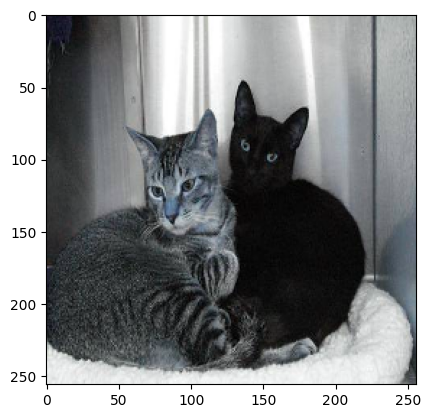

In [2]:
plt.imshow(img)

In [3]:
class Patchify:
    def __init__(self, img_size=(256, 256), patch_size=128, n_channels=3):
        self.img_size = img_size
        self.patch_size = patch_size
        self.n_channels = n_channels
        self.num_of_patches = 0
       
    
    def _read_image(self, img):
        resized_img = cv2.resize(img, self.img_size, interpolation=cv2.INTER_CUBIC)
        resized_img = resized_img.transpose(2,1,0)
        return resized_img
    
    
    def show_patch_image(self, img):
        plt.imshow(img.transpose(2,1,0))

        
    def patchify_image(self, img):
        img = self._read_image(img)
        patch_img=[]
        for row in range(0, self.img_size[0], self.patch_size):
            for col in range(0, self.img_size[0], self.patch_size):
                images=[]
                self.num_of_patches +=1
                for c in range(self.n_channels):
                    images.append(img[c, row:row+self.patch_size, col:col+self.patch_size])
                patch_img.append(np.stack(images))
        return patch_img

In [8]:
patch = Patchify()
image = patch.patchify_image(img)

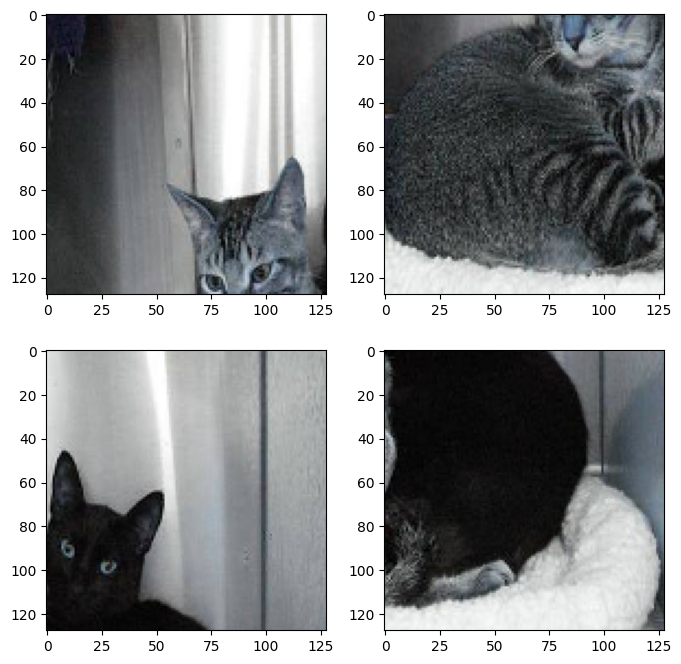

In [9]:
fig = plt.figure(figsize=(8,8))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows,columns, i)
    plt.imshow(image[i-1].transpose(2,1,0))
plt.show()

In [10]:
patch.num_of_patches

4

In [12]:
fig.savefig('patches.jpg')
